농어의 무게의 데이터로 길이 말고 *높이와 두께 데이터*도 있다면, 이 모두를 어떻게 적용해야 할 까 ? 

선형 회귀는 특성이 많을 수록 엄청난 효과를 낸다. <br>
높이와 두께 모두 다항 회귀에 사용해 보자. <br> 



직접 만들지 말고, 사이킷런의 PolynimalFeatures 클래스를 사용해 보면 훨씬 편하다.

## 다중 회귀
여러 개의 특성을 사용한 선형 회귀를 **다중 회귀**라 한다. 

3-2에서처럼 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이다. <br>
2개의 특징을 사용하면 **평면**을 학습한다.  

특성이 2개면 타깃값과 함께 3차원 공간을 형성하고 *선형 회귀 방정식* <br>
$타깃 = a*특성1 + b*특성2 + 절편$ 은 평면이 된다. 

그럼 특성이 3개인 경우는 ? 안타깝지만 우리는 3차원 공간 이상을 그리거나 상상할 수 없다. 

분명한 것은 선형 회귀를 단순한 직선이나 평면으로 생각하여 
성능이 무조건 낮다고 오해해서는 안된다.  <br>
특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있다

이번에는 농어의 길이만 사용하지 않고, 농어의 높이와 두께도 사용하여 무게를 예측해 본다. <br>
또한 이전 절에서처럼 길이, 높이, 두께 각각의 특성을 제곱하여 추가한다. 

거기다가 각 특성을 서로 곱해서 또다른 특성을 만들 것이다. 즉 ***농어 길이 * 농어 높이***를 새로운 특성으로 만드는 것이다. <br>
이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학**이라고 부른다. 

우리가 직접 특성을 제곱하고, 특성끼리 곱해서 새로운 특성을 추가할 수도 있지만 <br>
사이킷런에서 제공하는 편리한 도구를 사용할 것이다. <br>
그럼 농어 데이터를 다시 불러오는 것부터 시작해 보자. 

## 데이터 준비

이전처럼 웹 사이트에서 복사해서 추가하는 것보다, 웹사이트의 csv 파일을 로드하는 것이 더 편리할 것이다. 
- https://bit.ly/perch_csv_data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방식으로 준비하자. <br>
https://bit.ly/perch_data

In [3]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

그 다음 perch_full과 perch_target을 훈련 세트와 테스트 세트로 나눈다. 

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

## 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위해 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 **변환기**라고 부른다. 

사이킷런의 모델 클래스에 일관된 fit() , score() , predict() 메서드가 있는 것처럼 <br>
변환기 클래스는 모두 ```fit() , transform()``` 함수가 있다. 

우리가 사용할 변환기는 PolynomialFeatures 클래스이다. <br>
``` from sklearn.preprocessing import PolynomialFeatures ```

In [7]:
from sklearn.preprocessing import PolynomialFeatures

간단한 예시 )
- 2개의 특성 2와 3으로 이루어진 샘플 하나를 사용하여
- fit 함수와 transform 함수를 사용해 보자.

In [9]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [28]:
test_poly = poly.transform(test_input)

[2, 3]에서 같거나 다른 두 개의 숫자를 골라서 곱한 값에 1을 추가한 배열을 받을 수 있다. 

훈련을 해야 transform이 가능하다. 사이킷런의 일관된 api 때문에 두 단계로 나뉘어 있다. <br>
두 메서드를 하나로 붙인 fit_transform 함수도 있다. 

1은 왜 추가되었을까 ? 다음의 식을 보자. <br>
```무게 = a * 길이 + b * 높이 + c * 두께 + d * 1 ```

사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. 이렇게 놓고 보면 특성은 <br>
( 길이, 높이, 두께, 1 )이 된다. 

하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다. 

```include_bias = False ``` 로 지정하여 다시 특성을 변환하자.

In [26]:
print(len([[2, 3]])) # 2차원 리스트
print(np.array([[2, 3]]).shape)

1
(1, 2)


In [13]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))


[[2. 3. 4. 6. 9.]]


이제 이 방식으로 train_input에 적용시켜 보자. <br>
train_input을 변환한 데이터를 train_poly에 저장하고 이 배열의 크기를 확인해 보자.

In [20]:
print(train_input.shape)

(42, 3)


In [14]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공한다. <br>
다음처럼 ***get_feature_names()*** 메서드를 호출하면, 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려준다. 

In [17]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

get_feature_names 함수는 곧 없어진다. get_feature_names_out 함수로 대체하자. 

이어서 변환된 특성을 이용하여 다중 회귀 모델을 훈련하겠다. 

## 다중 회귀 모델 훈련하기

먼저 LinearRegression 클래스를 import 하고 훈련해 보자. 

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 훈련
lr.fit(train_poly, train_target)

LinearRegression()

In [19]:
print(lr.score(train_poly, train_target))

0.9903183436982125


아주 높은 점수가 나왔다. 농어의 길이뿐만 아니라 두께를 모두 사용했고, 각 특성을 제곱하거나 서로 곱해서 다항 특성을 추가했다. <br>
특성이 늘어날 수록 선형 회귀의 능력은 매우 강해졌다.  

테스트 세트에 대한 점수 확인 

In [29]:
print(lr.score(test_poly, test_target))

0.9714559911594155


과소적합 문제는 더 이상 나타나지 않았다. 

특성을 더 많이 추가하면 어떨까 ? 3제곱, 4제곱, 5제곱을 넣는 것 <br>
PolynomialFeatures 크래스의 ```degree``` 변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다. <br>
```PolynomialFeatures(degree = 5, include_bias = False)```

In [30]:
poly = PolynomialFeatures(degree = 5, include_bias = False)

In [31]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


만들어진 특성의 개수가 무려 55개에 달한다. <br>
train_poly 배열의 열의 개수가 특성의 개수이다. <br>
이 데이터를 사용해 선형 회귀 모델을 다시 훈련하겠다. 

In [32]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


거의 완벽한 점수이다. 그러면 테스트 점수는 ? 

In [34]:
print(lr.score(test_poly, test_target))

-144.40744532797535


-144 ??? 너무 큰 음수이다. 문제가 무엇일까 ? 

특성의 개수를 늘리면 선형 모델은 아주 강력해진다. 훈련 세트에 대해서 거의 완벽하게 학습할 수 있다. <br>
하지만 이런 모델은 훈련 세트에 너무 과대적합이므로 테스트 세트에서는 형편없는 점수를 만든다. 

이 문제를 해결하려면 다시 특성을 줄여야 한다.<br>
그러나 우리는 다른 방식으로 과대적합을 줄여 볼 것이다. 

## 규제
- 규제 : 머신러닝 모델이 훈련 세트를 너무 훈련하지 않도록 훼방하는 것을 말한다. 
- 즉 모델이 훈련 세트에 과대적합하지 않도록 만드는 것이다. <br>
- 선형 모델의 경우 특성에 곱해지는 계수( 또는 기울기 )의 크기를 작게 만드는 것이다. 

***특성의 스케일*** : 
- 2장에서 보았듯이 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이난다. 
- 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다. 
- 그러면 규제를 적용하기 전에 먼저 정규화를 하자. 

2장에서는 평균과 표준편차를 구해 표준점수로 바꾸었지만, <br>
이 번에는 사이킷런에서 제공하는 ***StandardScaler*** 클래스를 사용하겠다. <br>
이 클래스도 변환기 중 하나이다. 

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여 보자. 

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

이제 표준점수로 변환한 train_scaled와 test_scaled가 준비되었다. <br>
훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 *mean_, scale_* 속성에 저장된다. <br>
특성마다 계산하므로 55개의 평균과 표준 편차가 들어 있다. 

선형 모델에 규제를 추가한 모델을 **릿지** 모델과 **라쏘** 모델이라 부른다. <br>
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 : 계수를 절댓값한 값을 기준으로 규제를 적용 <br>
일반적으로 릿지를 조금 더 선호한다. 

두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다. <br>
물론 싸이킷런이 이 두 알고리즘을 모두 제공한다. 

릿지와 라쏘 모델모두 sklearn.linear_model 패키지 안에 있다. <br>
훈련하고 점수를 매기는 방식은 동일하다. 

## 릿지 회귀

앞서 준비한 train_scaled 모델로 훈련하고 점수를 매겨 보자. 

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# 훈련 
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


선형 회귀에서는 거의 완벽에 가까웠던 점수가 조금 낮아졌다. 이번에는 테스트 점수를 확인해 보자. 

In [38]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


테스트 세트가 정상으로 돌아왔다. <br>
많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다. 

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. <br>
모델 객체를 만들 때 ***alpha 매개변수***로 규제의 강도를 조절한다. <br>
따라서 alpha 값은 하이퍼파라미터이다. 

alpha 값이 크면 규제의 정도가 더 세지므로 조금 더 과소적합되도록 유도한다. <br>
값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 수 있다. 

적절한 alpha 값을 찾는 한 가지 방법은 alpha값에 대한 $R^2$ 값의 그래프를 그려 보는 것이다. <br>
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다. <br>
먼저 matplotlib을 import하고 alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만든다. 

In [39]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

다음 코드는 alpha 값을 0.001 에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 <br>
훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다. 

In [40]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려 보자. alpha 값을 0.001부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 <br>
그래프 왼 쪽이 너무 촘촘해진다. alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 <br>
로그 함수로 바꾸어 지수로 표현하겠다. 즉 0.001은 -3, 100은 2가 되는 것이다. 

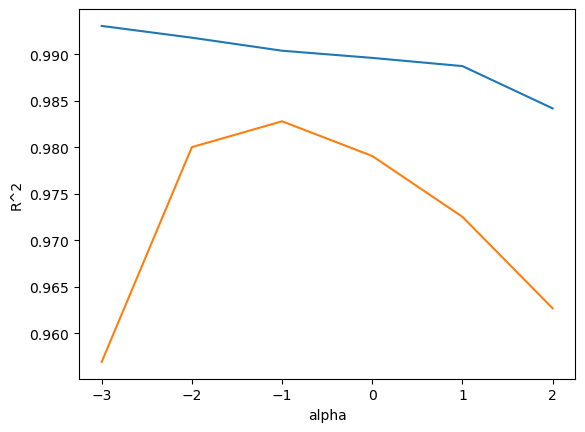

In [41]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위는 훈련 그래프, 아래는 테스트 세트 그래프이다. 이 그래프의 왼쪽을 보면 훈련 세트와 테스트 세트의 점수 차이가 매우 크다. <br>
훈련 세트에는 잘 맞고, 테스트 세트에는 형편없느 과대적합의 전형적인 모습이다. <br>

반대로 오른쪽 편은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합의 모습이다. 

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 점수가 가장 높은 -1, 즉 1/10 이다. <br>
alpha 값을 0.1로 하여 최종 모델을 훈련하겠다. 

In [42]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


이 모델은 훈련 세트와 테스트 세트의 점수가 모두 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다. <br>
그럼 이번에는 라쏘 모델을 훈련해 보자 .

## 라쏘 회귀

훈련하는 것은 릿지 모델과 매우 유사하다. Ridge 클래스를 Lasso 클래스로 변환하는 것이 전부이다, 

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

라쏘도 과대적합을 잘 억제한 결과를 보여 준다. 테스트 점수도 확인해 보자. 

In [44]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


테스트 세트의 점수도 아주 좋다. 

라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다. <br>
여기에서도 앞에서와 같이 alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수를 계산하겠다. 

In [45]:
train_score = []
test_score = []
for alpha in alpha_list: # 위의 alpha_list 그대로 사용
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled ,train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

이제 최적의 alpha 값을 보기 위한 그래프를 그려 보자.

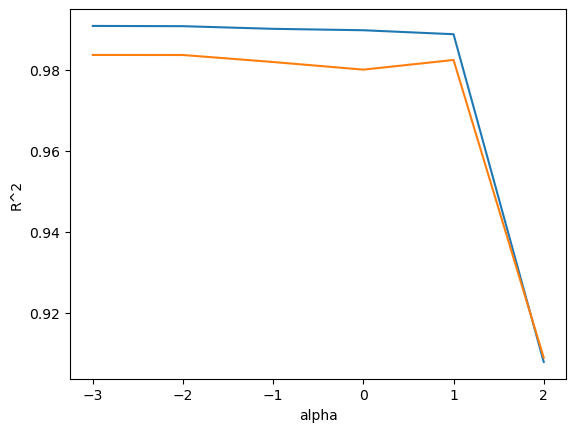

In [47]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

이 그래프도 왼쪽은 과대적합을 보여 주고 있고, 오른쪽으로 갈 수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다. <br>
가장 오른쪽은 아주 크게 점수가 떨어지고 있다. 이 지점은 분명 과소적합되는 모델일 것이다. <br>
라쏘 모델에서 최적의 alpha 값은 log10(alpha) = 1, 즉, 10^1인 10을 의미한다. 

In [48]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


모델이 잘 훈련된 것 같다. 특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였다. 

앞에서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있었다고 했다. <br>
라쏘 모델의 계수는 ```coef_``` 속성에 저장되어 있다. 이 중에 0인 것을 헤아려 보자.

In [50]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

정말 많은 계수가 0이 되었다. 55개의 특성을 모델에 주입했지만, 라쏘 모델이 사용한 특성은 <br>
15개밖에 되지 않았다. 이런 특징 때문에 라쏘 모델은 **유용한 특성을 골라내는 용도**로 사용할 수 있다.